# Lendo do Banco de dados

In [5]:
from __future__ import print_function
from datetime import date, datetime, timedelta
import mysql.connector

In [6]:
cnx = mysql.connector.connect(user='root', database='estudos_em')
cursor = cnx.cursor()

In [10]:
sql = "SELECT * FROM alunos WHERE 1"
cursor.execute(sql)
results = cursor.fetchall()
print(results[1])

(100066, '2', '1985-03-29 00:00:00.000', '128', '1', '1', '64', 64, 8, '20032', '20032', '4096', '20081', '1024', '274', '282')


In [11]:
cnx.close()

In [70]:
lista = []
for y in range(0, len(results)):
    lista.append([])
    for x in range(len(results[y])):
        lista[y].append(0)
        lista[y][x] = results[y][x]

# Código

In [71]:
import pandas as pd
from collections import OrderedDict
from datetime import date

In [72]:
from numpy import *
import csv
import sqlite3

In [74]:
andrews_matriz = lista[0:5000]
print(andrews_matriz[5])

[100790, '2', '1983-02-04 00:00:00.000', '128', '1', '1', '1', 2, 2, '20041', '20041', '128', '20091', '2', '180', '110']


# Curva de Andrews

In [75]:
for y in range(0, len(andrews_matriz)):
    del(andrews_matriz[y][2])
    del(andrews_matriz[y][3])
    del(andrews_matriz[y][0])
    for x in range(0, len(andrews_matriz[y])):
        if(andrews_matriz[y][x] != ''):
            andrews_matriz[y][x] = int(andrews_matriz[y][x])
        else:
            andrews_matriz[y][x] = 0

print(andrews_matriz[0])
print(len(andrews_matriz))
print(len(lista))
print(lista[0])

[1, 128, 1, 32, 1, 1, 20032, 20032, 4096, 20081, 1024, 240, 240]
5000
7681
[1, 128, 1, 32, 1, 1, 20032, 20032, 4096, 20081, 1024, 240, 240]


   0        1   2   3   4   5      6      7     8      9     10   11   12
0   1      128   1  32   1   1  20032  20032  4096  20081  1024  240  240
1   2      128   1  64  64   8  20032  20032  4096  20081  1024  274  282
2   2      128   1  32   1   1  20032  20032  4096  20081  1024  240  232
3   2        0   1  32   1   1  20032  20032    16  20042     2  240    6
4   1  1048576   1  32   1   1  20032  20032  2048  20042     2  240    6
128          3134
512           391
2048          256
524288        188
67108864      158
0             138
32             90
131072         76
8388608        71
65536          62
1024           56
262144         55
64             51
16384          38
32768          32
1048576        28
8192           28
134217728      27
8              23
4096           20
256            20
16777216       16
2097152        16
33554432       11
4               6
2               5
16              2
4194304         2
Name: 1, dtype: int64


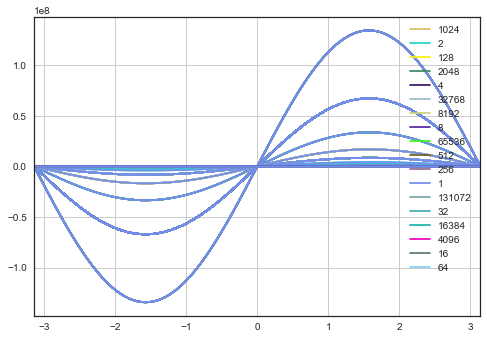

In [90]:
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import andrews_curves
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.DataFrame(andrews_matriz) # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
print(iris.head())

# Let's see how many examples we have of each species
print(iris[1].value_counts())


andrews_curves(iris, 10)

plt.show()

# Coordenadas paralelas

      0         1   2    3   4   5      6      7     8      9     10   11   12
0      1       128   1   32   1   1  20032  20032  4096  20081  1024  240  240
1      2       128   1   64  64   8  20032  20032  4096  20081  1024  274  282
2      2       128   1   32   1   1  20032  20032  4096  20081  1024  240  232
3      2         0   1   32   1   1  20032  20032    16  20042     2  240    6
4      1   1048576   1   32   1   1  20032  20032  2048  20042     2  240    6
5      2       128   1    1   2   2  20041  20041   128  20091     2  180  110
6      1       128   1   32   2   2  20041  20041   128  20082  1024  180  168
7      2       128   1   32   2   2  20041  20041   128  20061     2  180   42
8      2       128   1   32   2   2  20041  20041   128  20092  1024  180  178
9      2       128   1   32  64   8  20041  20041   128  20082  1024  274  255
10     1    524288   1    2  64   8  20041  20041   128  20061   128  274   68
11     2       128   1   32  64   8  20041  20041   

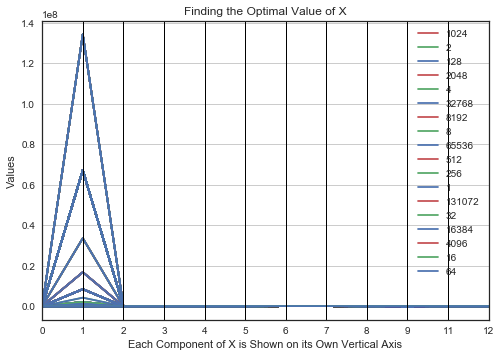

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

data = pd.DataFrame(andrews_matriz)
#data = pandas.read_csv(r'C:\Python27\Lib\site-packages\pandas\tests\data\iris.csv', sep=',')
data2 = data[[0,1,2,3,4,5,6,7,8,9,10,11,12]]
print(data2)
parallel_coordinates(data2, 10,color=['r','g','b'])
plt.xlabel("Each Component of X is Shown on its Own Vertical Axis")
plt.ylabel("Values")
plt.title("Finding the Optimal Value of X")
plt.show()

# PCA

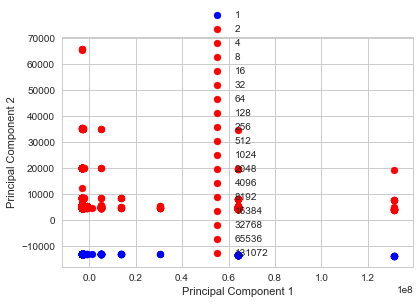

In [93]:
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import radviz
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.DataFrame(andrews_matriz)
# iris = pd.read_csv("iris.csv") # the iris dataset is now a Pandas DataFrame

X_std = iris.ix[:,0:12].values
y = iris.ix[:,10].values
# Let's see how many examples we have of each species
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072),
                        ('blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


plt.show()